## Libraries 

In [2]:
import pandas as pd 

## Build data sets 

**Wassem 1**

In [3]:
wassem_1 = pd.read_csv('wassem_css.csv', sep='\t', error_bad_lines=True)

In [4]:
wassem_1 = wassem_1[['Text','Expert_Annotation']]
racism_data_1 = wassem_1[wassem_1['Expert_Annotation']!='sexism']
sexism_data_1 = wassem_1[wassem_1['Expert_Annotation']!='racism']

In [5]:
racism_data_1['Expert_Annotation'].value_counts()

neither    5729
racism       88
both         35
Name: Expert_Annotation, dtype: int64

In [6]:
sexism_data_1['Expert_Annotation'].value_counts()

neither    5729
sexism      815
both         35
Name: Expert_Annotation, dtype: int64

**Wassem 2**

In [7]:
wassem_2 = pd.read_csv('wassem_hovy_naacl.csv', sep='\t')

In [8]:
wassem_2 = wassem_2[['Text','Label']]
racism_data_2 = wassem_2[wassem_2['Label']!='sexism']
sexism_data_2 = wassem_2[wassem_2['Label']!='racism']

In [9]:
racism_data_2['Label'].value_counts()

none      11115
racism     1939
Name: Label, dtype: int64

In [10]:
sexism_data_2['Label'].value_counts()

none      11115
sexism     3148
Name: Label, dtype: int64

**Racism Data** 

In [11]:
racism_data_1.columns = ['Tweets','Label']
racism_data_2.columns = ['Tweets','Label']

racism = pd.concat([racism_data_1,racism_data_2], axis=0, ignore_index=True)
racism['Label'].value_counts()

# Encoding 
racism['Label'].replace('none','0', inplace=True)
racism['Label'].replace('neither','0', inplace=True)
racism['Label'].replace('racism','1', inplace=True)
racism['Label'].replace('both','1', inplace=True)

# Racist Vs Not Racist 
racism['Label'].value_counts()

0    16844
1     2062
Name: Label, dtype: int64

**Sexism Data**

In [12]:
sexism_data_1.columns = ['Tweets','Label']
sexism_data_2.columns = ['Tweets','Label']

sexism = pd.concat([sexism_data_1,sexism_data_2], axis=0, ignore_index=True)
sexism['Label'].value_counts()

# Encoding 
sexism['Label'].replace('none','0', inplace=True)
sexism['Label'].replace('neither','0', inplace=True)
sexism['Label'].replace('sexism','1', inplace=True)
sexism['Label'].replace('both','1', inplace=True)

# Racist Vs Not Racist 
sexism['Label'].value_counts()

0    16844
1     3998
Name: Label, dtype: int64

# Racism Recognition in Tweets 

### Data 

In [13]:
racism.head()

,Tweets,Label
0,@TVBachelor @NewJerzeyBoy what about the femin...,1
1,@ThelmaSleaze uh... did you watch the video? o...,1
2,Managed to hit a bird and a small rodent on my...,1
3,"If you believe a #holohoax or #gays, LGBT &amp...",1
4,"Rid yourself of #Feminazi, #Fag &amp; #Jewf. E...",1


In [14]:
# Missing values 
racism.isnull().sum()

Tweets    0
Label     0
dtype: int64

In [15]:
# Data cleaning 
from DPreprocessing import data_cleaning
X = data_cleaning(racism['Tweets'])
y = racism['Label']

>>>>>> Data Cleaning Process : Start
>>> Normalization | Remove ids @ | Replace urls by URL tag | Remove Special char | Remove Punctuation 


**Tweets Canonization**

In [17]:
from DPreprocessing import canonization

In [18]:
%%time 
# Lemmatized tweets 
X_lem = canonization(X, method="lemmatization")

CPU times: user 1min 57s, sys: 670 ms, total: 1min 58s
Wall time: 1min 59s


In [19]:
%%time 
# Stemmed tweets  
X_stem = canonization(X, method="stemming")

CPU times: user 5.06 s, sys: 284 ms, total: 5.34 s
Wall time: 5.4 s


**Tweets Vectorization** <br> 
Tokens number = 1000

In [20]:
%%time 
# Bag of words + Lemmatization
from Vectorizer import bag_of_words
X_lem_bow = bag_of_words(X_lem, nbr_tokens=1000)

CPU times: user 490 ms, sys: 33.1 ms, total: 523 ms
Wall time: 534 ms


In [21]:
%%time 
# Bag of words + Stemming 
from Vectorizer import bag_of_words
X_stem_bow = bag_of_words(X_stem, nbr_tokens=1000)

CPU times: user 460 ms, sys: 31.5 ms, total: 492 ms
Wall time: 490 ms


In [22]:
%%time 
# Tfidf + Lemmatization 
from Vectorizer import tfidf
X_lem_tfidf = tfidf(X_lem, nbr_tokens=1000, ngram=1)

CPU times: user 265 ms, sys: 30.4 ms, total: 295 ms
Wall time: 296 ms


In [23]:
%%time 
# Tfidf + Stemming 
from Vectorizer import tfidf
X_stem_tfidf = tfidf(X_stem, nbr_tokens=1000, ngram=1)

CPU times: user 257 ms, sys: 29.8 ms, total: 287 ms
Wall time: 285 ms


In [24]:
%%time 
# Hashing + Lemmatization
from Vectorizer import hashing
X_lem_hashing = hashing(X_lem, nbr_tokens=1000)

CPU times: user 228 ms, sys: 33.8 ms, total: 262 ms
Wall time: 261 ms


In [25]:
%%time 
# Hashing + Stemming
from Vectorizer import hashing
X_stem_hashing = hashing(X_stem, nbr_tokens=1000)

CPU times: user 214 ms, sys: 31.9 ms, total: 246 ms
Wall time: 244 ms


## Features Engineering

In [140]:
def newfeatures(newf, tweets):
    matrix = []
    for tweet in tweets:
        values = []
        for feature in newf:
            if feature in tweet: values.append(1)
            else: values.append(0)
        matrix.append(values)
    return pd.DataFrame(matrix, columns=newf)

**Polarity**

In [143]:
def polarity(tweets):
    from textblob import TextBlob
    polarity = []
    for tweet in tweets: 
        pol = TextBlob(tweet)
        polarity.append(pol.sentiment.polarity)
    return pd.DataFrame(polarity)

In [148]:
discriminant_tweets_polarity = polarity(racism['Tweets'][racism['Label']=='1'])
non_discriminant_tweets_polarity = polarity(racism['Tweets'][racism['Label']=='0'])

<AxesSubplot:ylabel='Frequency'>

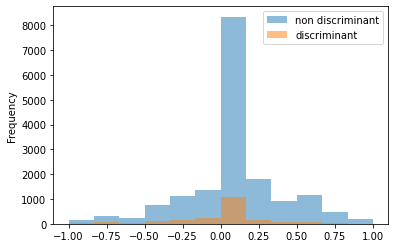

In [155]:
tweets_polarity = pd.concat([non_discriminant_tweets_polarity,discriminant_tweets_polarity], axis=1)
tweets_polarity.columns = ['non discriminant','discriminant']
tweets_polarity.plot.hist(bins=12, alpha=0.5)

**Tweets length**

In [30]:
def len_tweets(tweets):
    length = []
    for tweet in tweets:
        length.append(len(tweet))
    return pd.DataFrame(length)

In [42]:
length = len_tweets(X)

**Shallow Parsing**

In [112]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [113]:
def tweet_noun_chunks(tweets):
    '''
        This function generates a list of noun chunks who's tokens are not in stopwords list 
    '''
    from nltk.corpus import stopwords
    
    tweets_noun_chunks = []
    for tweet in tweets:
        doc = nlp(tweet)
        for chunk in doc.noun_chunks: 
            if len(str(chunk).split())>1 and any(word in str(chunk).split() for word in stopwords.words('english'))==False:
                #print(">>>>> ", chunk) 
                tweets_noun_chunks.append(chunk.text.strip())
    return pd.Series(tweet_noun_chunks).value_counts().index.tolist()

In [121]:
# To continue 

**NGram Features** 

In [77]:
def ngram(tweets, nbr_gram, stopwords):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features=None, 
                                stop_words=stopwords,
                                ngram_range = (nbr_gram,nbr_gram)
                                )
    vectorizer.fit(tweets)
    vocab = list(vectorizer.vocabulary_.keys())
    
    return vocab 

In [98]:
def ngrams_frequency(tweets, grams):
    
    # all tweets in one single string 
    all_tweets = tweets.sum(axis=0)
    
    ngrams_frequency = []
    for gram in grams:
        ngrams_frequency.append([gram,all_tweets.count(gram)])
    
    matrix = pd.DataFrame(ngrams_frequency,columns=['Gram','Frequencies'])
    matrix.sort_values(by='Frequencies', ascending=False, inplace=True)
    return matrix

In [111]:
%%time
# 100 bigram features 
onegram = ngram(X_lem, nbr_gram=1, stopwords='english')
onegram = ngrams_frequency(X_lem, onegram)
onegram_100 = onegram['Gram'][:100]
onegram_features = newfeatures(onegram_100, X_lem)

CPU times: user 26.2 s, sys: 4.96 s, total: 31.1 s
Wall time: 31.6 s


<AxesSubplot:xlabel='Gram'>

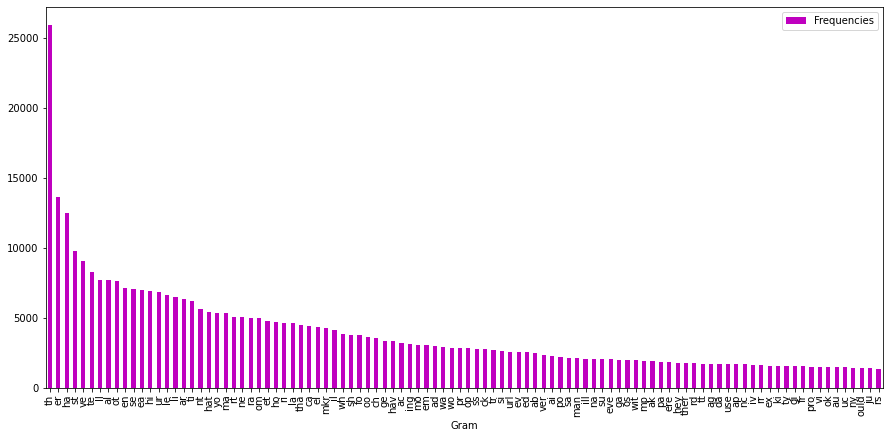

In [116]:
onegram[:100].plot(x='Gram', y='Frequencies', kind='bar', color='m', figsize=(15,7))

In [107]:
%%time
# 100 bigram features 
bigram = ngram(X_lem, nbr_gram=2, stopwords='english')
bigram = ngrams_frequency(X_lem, bigram)
bigram_100 = bigram['Gram'][:100]
bigram_features = newfeatures(bigram_100, X_lem)

CPU times: user 1min 26s, sys: 5.7 s, total: 1min 32s
Wall time: 1min 33s


<AxesSubplot:xlabel='Gram'>

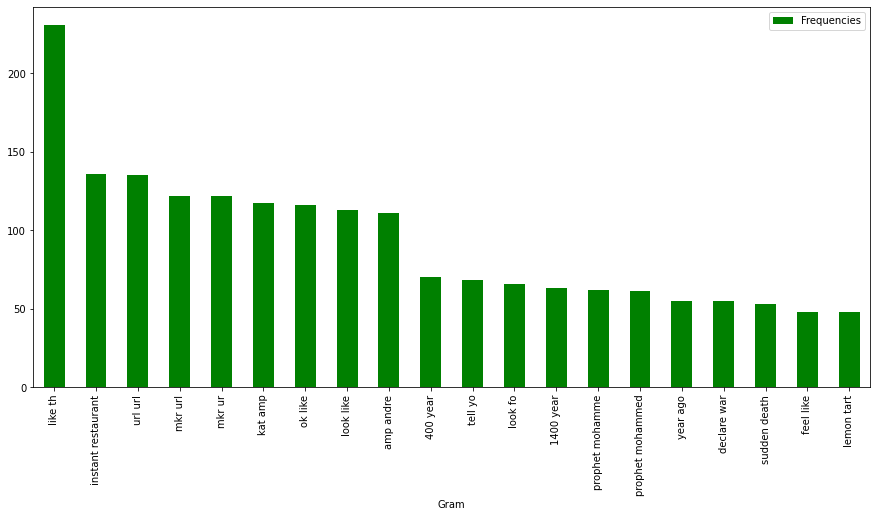

In [117]:
bigram[:20].plot(x='Gram', y='Frequencies', kind='bar', color='g', figsize=(15,7))

In [108]:
%%time
# 100 bigram features 
trigram = ngram(X_lem, nbr_gram=3, stopwords='english')
trigram = ngrams_frequency(X_lem, trigram)
trigram_100 = trigram['Gram'][:100]
trigram_features = newfeatures(trigram_100, X_lem)

CPU times: user 1min 21s, sys: 5.04 s, total: 1min 26s
Wall time: 1min 26s


<AxesSubplot:xlabel='Gram'>

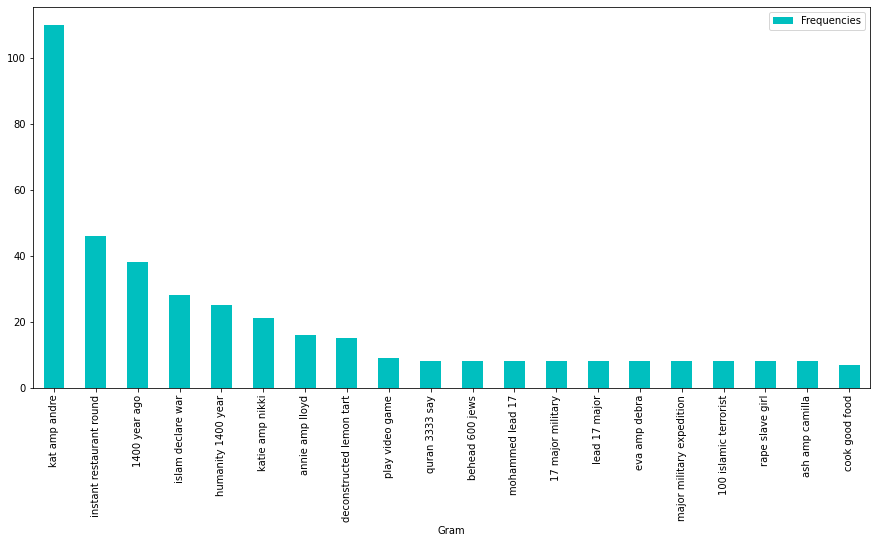

In [110]:
trigram[:20].plot(x='Gram', y='Frequencies', kind='bar', color='c', figsize=(15,7))

**Combine features**

In [55]:
def combine_features(X, *new_features):
    X = pd.DataFrame(X)
    F = pd.concat(list(new_features), axis=1)
    return pd.concat([F,X], axis=1)

In [62]:
Features = combine_features(X_lem_tfidf, polarity, length)

## Modeling

**Lemmatization + Tfidf** 

In [87]:
%%time
# Split data  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lem_tfidf, y, test_size=0.30, random_state=42, shuffle=True)

# Training & Evaluation 
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_m1 = f1_score(y_test, y_pred, pos_label='1')
accuracy_m1 = accuracy_score(y_test, y_pred)

CPU times: user 1min 18s, sys: 260 ms, total: 1min 19s
Wall time: 1min 19s


**Stemming + Tfidf**

In [88]:
%%time
# Split data  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stem_tfidf, y, test_size=0.30, random_state=42, shuffle=True)

# Training & Evaluation 
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_m2 = f1_score(y_test, y_pred, pos_label='1')
accuracy_m2 = accuracy_score(y_test, y_pred)

CPU times: user 1min 18s, sys: 298 ms, total: 1min 19s
Wall time: 1min 19s


**Lemmatization + TFIDF + Features(Polarity + Length)**

In [89]:
%%time

# Features 
Features = combine_features(X_lem_tfidf, polarity, length)

# Split data  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.30, random_state=42, shuffle=True)

# Training & Evaluation 
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_m3 = f1_score(y_test, y_pred, pos_label='1')
accuracy_m3 = accuracy_score(y_test, y_pred)

CPU times: user 2min 7s, sys: 632 ms, total: 2min 7s
Wall time: 2min 8s


**Lemmatization + TFIDF + Features(Polarity + Length + 20Bigram + 20Trigram)**

In [104]:
%%time

# Features 
Features = combine_features(X_lem_tfidf, polarity, length, bigram_features, trigram_features)

# Split data  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.30, random_state=42, shuffle=True)

# Training & Evaluation 
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_m4 = f1_score(y_test, y_pred, pos_label='1')
accuracy_m4 = accuracy_score(y_test, y_pred)

CPU times: user 2min 19s, sys: 2.2 s, total: 2min 21s
Wall time: 2min 47s


## Preproceing Results

In [105]:
m1 = ["Lemmatization POS + TFIDF ",accuracy_m1,f1_score_m1]
m2 = ["Stemming + TFIDF ",accuracy_m2,f1_score_m2]
m3 = ["Lemmatization + TF-IDF + Polarity + Lenght",accuracy_m3,f1_score_m3]
m4 = ["Lemmatization + TF-IDF + Polarity + Lenght + Bigram + Trigram",accuracy_m4,f1_score_m4]
#m5 = ["Lemmatization POS + BOW + Features Extraction",accuracy_m5,f1_score_m5]
#m6 = ["TF-IDF + Features Extraction",accuracy_m6,f1_score_m6]
#m7 = ["Hashing + Features Extraction",accuracy_m7,f1_score_m7]

In [71]:
def results(*args):
    '''
        [Method,Accuracy,F1Score]
    '''
    
    methods_results = []
    for method in args:
        methods_results.append(method)
    return pd.DataFrame(methods_results,columns=["Methods","Accuracy","F1 Score"]) 

In [106]:
results(m1,m2,m3,m4)

,Methods,Accuracy,F1 Score
0,Lemmatization POS + TFIDF,0.943935,0.733221
1,Stemming + TFIDF,0.940233,0.710504
2,Lemmatization + TF-IDF + Polarity + Lenght,0.944288,0.734007
3,Lemmatization + TF-IDF + Polarity + Lenght + B...,0.944640,0.733447
